In [1]:
from PIL import Image
import numpy as np
import itertools
from matplotlib import pyplot as plt

## Step 1 - Design and build a dataset $X$ for character recognition of 20 16x16-pixel images (256 pixels per image) from online exemplars.

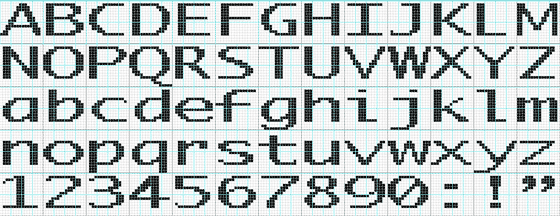

In [2]:
im = Image.open('alphabet.gif')
im

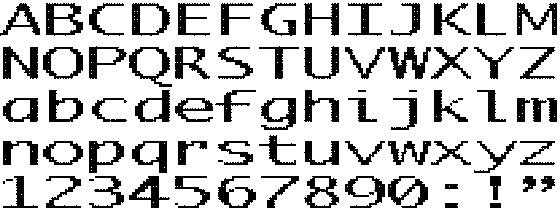

In [3]:
# convert image to black and white
im = im.convert('1')
im

In [4]:
np.array(im)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [5]:
w, h = im.size
print('width: ', w)
print('height:', h)

width:  560
height: 216


In [6]:
# list(im.getdata())

In [7]:
image_height = 16
image_width = 16
m = 13
n = 5
image_size = image_height*image_width
im_resize = im.resize((m*image_width, n*image_height))

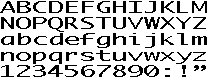

In [8]:
im_resize

In [9]:
pix = np.array(im_resize)
nrow, ncol = pix.shape
print(pix.shape)
print(pix.dtype)
# chanage the data type from bool to double
pix = pix.astype(np.float32)
print(pix.dtype)

(80, 208)
bool
float32


In [10]:
# construct the traing dataset 
n_sample = 20
n_channel  = 1
dataset = np.ndarray(shape=(n_sample, n_channel, image_height, image_width), dtype=np.float32)
dataset.shape
dataset.dtype

dtype('float32')

In [11]:
idx = 0
for i in range(5):
    for j in range(13):
        if( (i == 0 or i == 4) and ( 0 <= j <= 9) ):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset[idx] = x
            idx += 1
print("All images to array!")

All images to array!


In [12]:
dataset.shape

(20, 1, 16, 16)

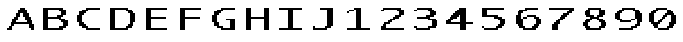

In [13]:
fig, axs = plt.subplots(1, 20 ,figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset):
        ax.imshow(dataset[i, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
        ax.axis('off')
    else:
        ax.remove()
plt.show()

In [14]:
dataset_reshaped = dataset.reshape((n_sample, 1, -1))

In [15]:
dataset_reshaped.shape

(20, 1, 256)

In [16]:
#lables of images
labels = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
         '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'] )
len(labels)
labels

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '0'], dtype='<U1')

In [17]:
import random 
random.seed(1)
lst = list(range(n_sample))
index = random.sample(lst, n_sample//2)
print(index) 
# index = [0, 1, 4, 5, 7, 12, 13, 14, 17, 19]
dataset_train  = dataset[index]
# dataset_train.shape
# mask = np.ones(n_sample, dtype=bool)
# mask[index] = False
# dataset_test  = dataset[mask]
# dataset_test.shape
labels_train  = labels[index]
labels_train

[4, 18, 2, 8, 3, 7, 12, 14, 13, 10]


array(['E', '9', 'C', 'I', 'D', 'H', '3', '5', '4', '1'], dtype='<U1')

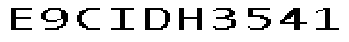

In [18]:
# training dataset
fig, axs = plt.subplots(1, n_sample//2 ,figsize=(6,6))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset_train):
        ax.imshow(dataset_train[i, 0], cmap='gray', interpolation='nearest')
        ax.axis('off')
        #save images to jepg image files
        temp = Image.fromarray(dataset_train[i, 0].astype('uint8')*255, "L")
        temp.save("training_" + str(i) + ".jpeg")
    else:
        ax.remove()
plt.show()

In [19]:
dataset.shape

(20, 1, 16, 16)

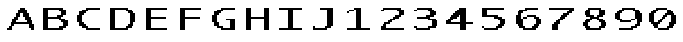

In [20]:
#test dataset (including images in the training set!)
fig, axs = plt.subplots(1, n_sample ,figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset):
        ax.imshow(dataset[i, 0], cmap='gray', interpolation='nearest')
        ax.axis('off')
        temp = Image.fromarray(dataset[i, 0].astype('uint8')*255, "L")
        temp.save("test_" + str(i) + ".jpeg")
    else:
        ax.remove()
plt.show()

In [21]:
# dataset_train_reshaped = dataset_train.reshape((n_sample//2, 1, -1))
# dataset_test_reshaped = dataset_test.reshape((n_sample//2, 1, -1))

## Step 2 - Design and develop a single-layer perceptron (SLP) in Python, using libraries such as PyTorch (and, if necessary, Tensor Flow). 

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [24]:
# Use the nn package to define our model
model = torch.nn.Sequential(
    nn.Linear(256, 256),
    nn.Sigmoid()
)

In [25]:
model

Sequential(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): Sigmoid()
)

## Step 3 - Train your SLP on a representative subset (10 images that your group selects and documents) from the 20-image dataset developed in 1), above.  

In [26]:
# read images from jpeg files in the training set
data_train = np.ndarray(shape=(n_sample//2, n_channel, image_height, image_width), dtype=np.float32)
for i in range(n_sample//2):
    filename = "training_" + str(i) + ".jpeg"
    print(filename)
    temp = Image.open(filename)
    # convert image to black and white
    temp = temp.convert('1')
    data_train[i, 0] = np.array(temp)   

training_0.jpeg
training_1.jpeg
training_2.jpeg
training_3.jpeg
training_4.jpeg
training_5.jpeg
training_6.jpeg
training_7.jpeg
training_8.jpeg
training_9.jpeg


In [27]:
dataset_train_reshaped = data_train.reshape((n_sample//2, 1, -1))

In [28]:
# batch_size = 10
# train_loader = torch.utils.data.DataLoader(dataset_train_reshaped, batch_size=batch_size, shuffle=True)
# # Use the nn package to define our model
# # Fully-connected Network 
# model = torch.nn.Sequential(
#     nn.Linear(256, 256),
#     nn.Sigmoid()
# )
# # define loss function.
# loss_fn = nn.MSELoss()
# # Use the optim package to define an Optimizer that will update the weights of
# # the model for us. Here we will use RMSprop; the optim package contains many other
# # optimization algorithms. The first argument to the RMSprop constructor tells the
# # optimizer which Tensors it should update.
# learning_rate = 1e-3
# # optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# for t in range (500):
#     for data in iter(train_loader):
#         y = data
#         x = data
#         # Forward pass: compute predicted y by passing x to the model.
#         y_pred = model(x)

#         # Compute and print loss.
#         loss = loss_fn(y_pred, y)
#         if (t % 10 == 0 ):
#             print("Epoch {} - loss: {}".format(t, loss.item()))

#         # Before the backward pass, use the optimizer object to zero all of the
#         # gradients for the variables it will update (which are the learnable
#         # weights of the model). This is because by default, gradients are
#         # accumulated in buffers( i.e, not overwritten) whenever .backward()
#         # is called. Checkout docs of torch.autograd.backward for more details.
#         optimizer.zero_grad()

#         # Backward pass: compute gradient of the loss with respect to model
#         # parameters
#         loss.backward()

#         # Calling the step function on an Optimizer makes an update to its
#         # parameters
#         optimizer.step()

In [29]:
#set seed for reproducible results 
torch.manual_seed(1)
np.random.seed(1)
# Use the nn package to define our model
# Fully-connected Network 
model = torch.nn.Sequential(
    nn.Linear(256, 256),
    nn.Sigmoid()
)
# define loss function.
loss_fn = nn.MSELoss()
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_all = []
for t in range (600):
    for i, data in enumerate(dataset_train_reshaped):
        y = torch.from_numpy(data)
        x = torch.from_numpy(data)
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)      
        if (i % 10 == 0 ) and (t % 10 == 0 ):
            print("Epoch {} - loss: {}".format(t, loss.item()))
            
        if (i % 10 == 0 ):
            loss_all += [loss]

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()

Epoch 0 - loss: 0.2717939019203186


C:\Users\yiming.xu\Anaconda3\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch 10 - loss: 0.061454787850379944
Epoch 20 - loss: 0.03661039099097252
Epoch 30 - loss: 0.023889444768428802
Epoch 40 - loss: 0.016695620492100716
Epoch 50 - loss: 0.012255597859621048
Epoch 60 - loss: 0.009343702346086502
Epoch 70 - loss: 0.007341779302805662
Epoch 80 - loss: 0.0059113409370183945
Epoch 90 - loss: 0.004855836741626263
Epoch 100 - loss: 0.00405559316277504
Epoch 110 - loss: 0.003434748388826847
Epoch 120 - loss: 0.0029434950556606054
Epoch 130 - loss: 0.0025481178890913725
Epoch 140 - loss: 0.002225167816504836
Epoch 150 - loss: 0.0019579455256462097
Epoch 160 - loss: 0.00173430354334414
Epoch 170 - loss: 0.0015452367952093482
Epoch 180 - loss: 0.0013839585008099675
Epoch 190 - loss: 0.001245273044332862
Epoch 200 - loss: 0.0011251497780904174
Epoch 210 - loss: 0.0010204218560829759
Epoch 220 - loss: 0.0009285737760365009
Epoch 230 - loss: 0.0008475857903249562
Epoch 240 - loss: 0.0007758208666928113
Epoch 250 - loss: 0.0007119417423382401
Epoch 260 - loss: 0.00065

Text(0, 0.5, 'MSEloss')

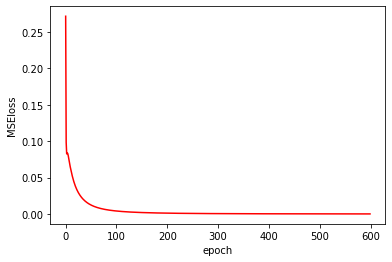

In [30]:
plt.plot(np.array(loss_all), 'r')
plt.xlabel("epoch")
plt.ylabel("MSEloss")

## Step 4 - Test your SLP on the entire 20-image dataset developed in 1), above -- with no noise introduced into the input dataset

In [31]:
#Compute metrics (described below) called fraction-of-hits (Fh) and fraction-of-false-alarms (Ffa)
# 0 -- black
# 1 -- white
def metrics(target, pred):
    Fh = (sum( (i == j) and (i == 0)  for i, j in zip(target, pred)) )/ sum(target == 0)
    Ffa = (sum( (i != j) and (i == 1)  for i, j in zip(target, pred)) )/ sum(target == 1)
    return Fh, Ffa

In [32]:
#Compute metrics (described below) called fraction-of-hits (Fh) and fraction-of-false-alarms (Ffa)
# 0 -- black
# 1 -- white
def metrics_v2(target, pred):
    Fh = sum((target == 0) & (target == pred))/ sum(target == 0)
    Ffa = sum((target == 1) & (target != pred))/ sum(target == 1)
    return Fh, Ffa

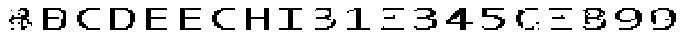

In [33]:
Fh_res = []
Ffa_res = []
fig, axs = plt.subplots(1, n_sample ,figsize=(12, 12))
for i, data in enumerate(dataset_reshaped):
    x = torch.from_numpy(data)
    output = model(x)
    output[output > 0.5] = 1
    output[output <= 0.5] = 0
    pred = output.detach().numpy()
    pred = pred.reshape((image_height, image_width ))
    ax = axs.flatten()[i]
    ax.imshow(pred, cmap='gray', interpolation='nearest')
    ax.axis('off')
    x = x.flatten().detach().numpy()
    y = output.flatten().detach().numpy()
    Fh, Ffa = metrics_v2(x, y)
    Fh_res+= [Fh]
    Ffa_res+= [Ffa]

In [34]:
Fh_res

[0.45454545454545453,
 0.8539325842696629,
 1.0,
 1.0,
 1.0,
 1.0,
 0.734375,
 1.0,
 1.0,
 0.5652173913043478,
 1.0,
 0.48148148148148145,
 1.0,
 1.0,
 1.0,
 0.5694444444444444,
 0.43478260869565216,
 0.7297297297297297,
 1.0,
 0.6626506024096386]

In [35]:
Ffa_res

[0.1368421052631579,
 0.041916167664670656,
 0.0,
 0.0,
 0.0,
 0.04433497536945813,
 0.005208333333333333,
 0.0,
 0.0,
 0.08571428571428572,
 0.0,
 0.039603960396039604,
 0.0,
 0.0,
 0.0,
 0.021739130434782608,
 0.06190476190476191,
 0.08241758241758242,
 0.0,
 0.08670520231213873]

Text(0, 0.5, 'Fh')

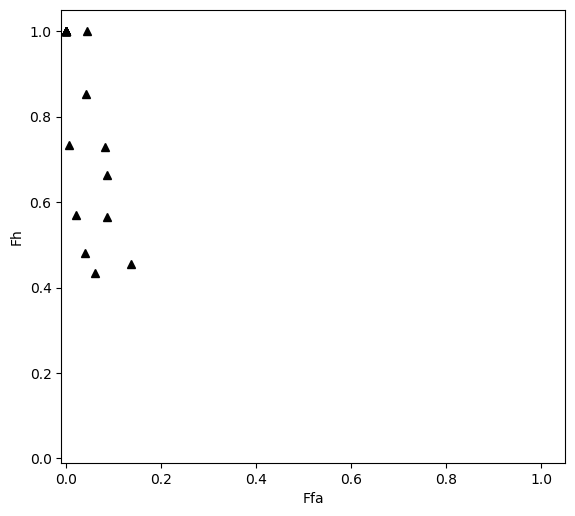

In [36]:
plt.figure(figsize=[6.5,6],dpi=100)
plt.plot(Ffa_res, Fh_res, '^', color='black');
plt.xlim(-0.01, 1.05)
plt.ylim(-0.01, 1.05)
plt.xlabel("Ffa")
plt.ylabel("Fh")
# plt.savefig('Fh_Ffa_noiseless.eps')

## Step 5 - Perturb your dataset (from 1), above) by adding noise

In [37]:
# standard deviation
sd = [0.0, 0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]

In [38]:
dataset_reshaped.shape
# dataset_noise = np.ndarray(shape=dataset_reshaped.shape, dtype=np.float32)
# dataset_noise.shape

(20, 1, 256)

In [39]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
def NoiseData(dataset, sigma):
    dataset_noise = np.ndarray(shape=dataset.shape, dtype=np.float32)
    #set seed for random numbers
    random.seed(1)
    for i in range(len(dataset)):
        s = np.random.normal(0, sigma, 25)
        index = random.sample(list(range(256)), 25)
        dataset_noise[i] = dataset[i]    
        dataset_noise[i, 0, index] = dataset_noise[i, 0, index] + s
        dataset_noise[i,0] = NormalizeData(dataset_noise[i,0 ])
    return dataset_noise   

In [40]:
dataset_reshaped[1, 0]  

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [41]:
# dataset_noise = np.ndarray(shape=(n_sample, image_size), dtype=np.float32)
# random.seed(1)
# for i in range(len(dataset)):
#     s = np.random.normal(0, sigma, 25)
#     index = random.sample(list(range(image_size)), 25)
#     dataset_noise[i] = dataset_reshaped[i]    
#     dataset_noise[i, index] = dataset_noise[i, index] + s
#     dataset_noise[i] = NormalizeData(dataset_noise[i])
    

In [42]:
# sigma = sd[8]
# dataset_noise = NoiseData(dataset_reshaped, sigma)
random.seed(1)
lst = list(range(n_sample))
index = random.sample(lst, n_sample//2)
print(index) 
# dataset_noise_train  = dataset_noise[index]

[4, 18, 2, 8, 3, 7, 12, 14, 13, 10]


In [41]:
# check the domain 
# print(np.max(dataset_noise_train))
# print(np.min(dataset_noise_train))

## Step 6 -  Repeat Tests in Step 4), above, and gather the results into a table of Fh and Ffa versus test-image-ID, with one row for each value of the standard deviation

In [42]:
# Fh_res_all = []
# Ffa_res_all = []
# for sigma in sd:
#     print(sigma)
#     dataset_noise = NoiseData(dataset_reshaped, sigma)
#     dataset_noise_train  = dataset_noise[index]
#     # Use the nn package to define our model
#     # Fully-connected Network 
#     model = torch.nn.Sequential(
#         nn.Linear(256, 256),
#         nn.Sigmoid()
#     )
#     # define loss function.
#     loss_fn = nn.MSELoss()
#     learning_rate = 1e-3
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#     #set seed for reproducible results 
#     torch.manual_seed(1)
#     np.random.seed(1)
#     for t in range (600):
#         for i, data in enumerate(dataset_noise_train):
#             y = torch.from_numpy(data)
#             x = torch.from_numpy(data)
#             # Forward pass: compute predicted y by passing x to the model.
#             y_pred = model(x)
#             # Compute and print loss.
#             loss = loss_fn(y_pred, y)
#             optimizer.zero_grad()
#             # Backward pass: compute gradient of the loss with respect to model
#             # parameters
#             loss.backward()
#             # Calling the step function on an Optimizer makes an update to its
#             # parameters
#             optimizer.step()
#     # test results
#     Fh_res = []
#     Ffa_res = []
#     fig, axs = plt.subplots(1, n_sample ,figsize=(12, 12))
#     for i, data in enumerate(dataset_noise):
#         x = torch.from_numpy(data)
#         output = model(x)
#         output[output > 0.5] = 1
#         output[output <= 0.5] = 0
#         pred = output.detach().numpy()
#         pred = pred.reshape((image_height, image_width ))
#         ax = axs.flatten()[i]
#         ax.imshow(pred, cmap='gray', interpolation='nearest')
#         ax.axis('off')
#         x = dataset_reshaped[i].reshape([-1])
#         y = output.flatten().detach().numpy()
#         Fh, Ffa = metrics(x, y)
#         Fh_res+= [Fh]
#         Ffa_res+= [Ffa]
#     Fh_res_all.append(Fh_res)
#     Ffa_res_all.append(Ffa_res)



0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


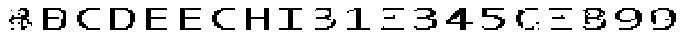

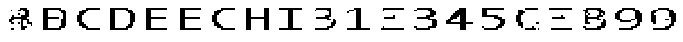

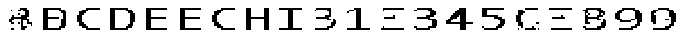

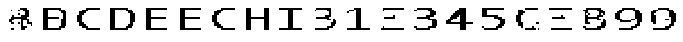

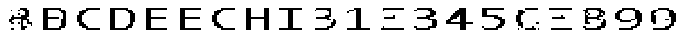

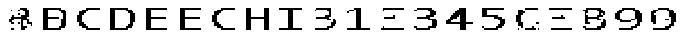

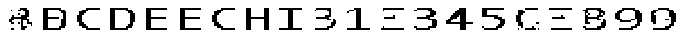

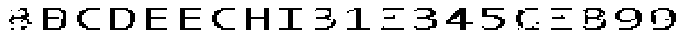

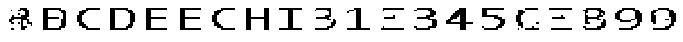

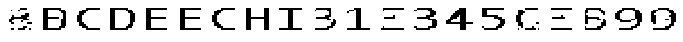

In [43]:
Fh_res_all = []
Ffa_res_all = []
for sigma in sd:
    print(sigma)
    dataset_noise = NoiseData(dataset_reshaped, sigma)
    # test results
    Fh_res = []
    Ffa_res = []
    fig, axs = plt.subplots(1, n_sample ,figsize=(12, 12))
    for i, data in enumerate(dataset_noise):
        x = torch.from_numpy(data)
        output = model(x)
        output[output > 0.5] = 1
        output[output <= 0.5] = 0
        pred = output.detach().numpy()
        pred = pred.reshape((image_height, image_width ))
        ax = axs.flatten()[i]
        ax.imshow(pred, cmap='gray', interpolation='nearest')
        ax.axis('off')
        x = dataset_reshaped[i].reshape([-1])
        y = output.flatten().detach().numpy()
        Fh, Ffa = metrics(x, y)
        Fh_res+= [Fh]
        Ffa_res+= [Ffa]
    Fh_res_all.append(Fh_res)
    Ffa_res_all.append(Ffa_res)

In [44]:
# # Use the nn package to define our model
# # Fully-connected Network 
# model = torch.nn.Sequential(
#     nn.Linear(256, 256),
#     nn.Sigmoid()
# )
# # define loss function.
# loss_fn = nn.MSELoss()
# learning_rate = 1e-3
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# random.seed(1)
# for t in range (600):
#     for i, data in enumerate(dataset_noise_train):
#         y = torch.from_numpy(data)
#         x = torch.from_numpy(data)
#         # Forward pass: compute predicted y by passing x to the model.
#         y_pred = model(x)

#         # Compute and print loss.
#         loss = loss_fn(y_pred, y)

#         optimizer.zero_grad()
#         # Backward pass: compute gradient of the loss with respect to model
#         # parameters
#         loss.backward()
#         # Calling the step function on an Optimizer makes an update to its
#         # parameters
#         optimizer.step()
# # test results
# Fh_res = []
# Ffa_res = []
# fig, axs = plt.subplots(1, n_sample ,figsize=(12, 12))
# for i, data in enumerate(dataset_noise):
#     x = torch.from_numpy(data)
#     output = model(x)
#     output[output > 0.5] = 1
#     output[output <= 0.5] = 0
#     pred = output.detach().numpy()
#     pred = pred.reshape((image_height, image_width ))
#     ax = axs.flatten()[i]
#     ax.imshow(pred, cmap='gray', interpolation='nearest')
#     ax.axis('off')
#     x = dataset_reshaped[i].reshape([-1])
#     y = output.flatten().detach().numpy()
#     Fh, Ffa = metrics(x, y)
#     Fh_res+= [Fh]
#     Ffa_res+= [Ffa]

In [44]:
sd

[0.0, 0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]

Text(0.5, 1.0, 'Graph of Fh and Ffa vs. Noise Standard Deviation\n for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron')

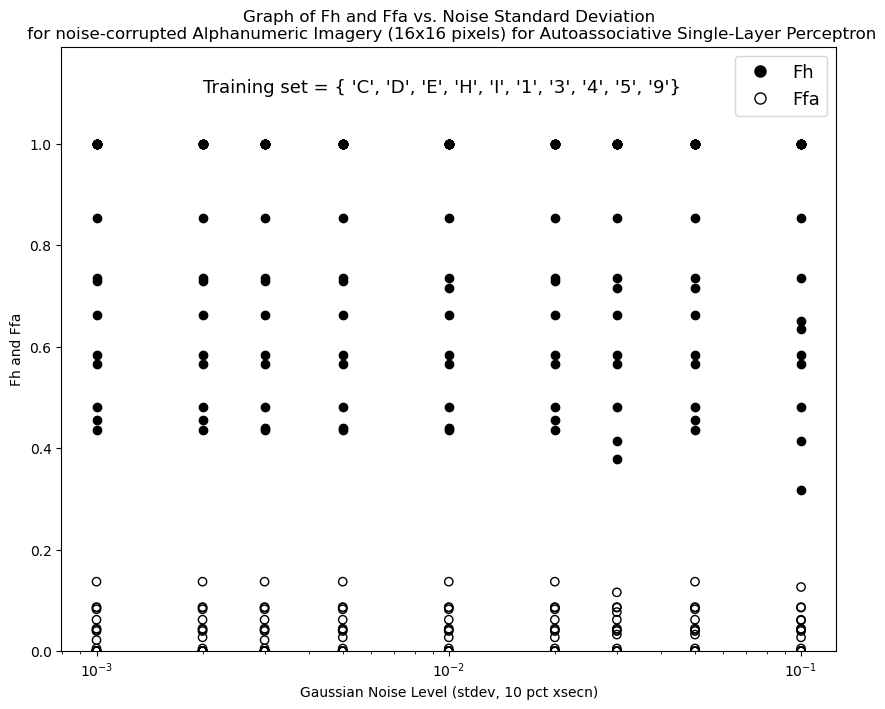

In [45]:
from matplotlib.lines import Line2D
plt.figure(figsize=[10,8],dpi=100)
for i in range(1, len(sd)):
    plt.plot([sd[i]]*n_sample, Fh_res_all[i],'o', color='black')
    plt.scatter([sd[i]]*n_sample, Ffa_res_all[i], facecolors='none', edgecolors='black')
    plt.xscale('log')

# plt.xlim(0, 0.1)
plt.ylim(0, 1.19)
plt.xlabel("Gaussian Noise Level (stdev, 10 pct xsecn)")
plt.ylabel("Fh and Ffa")
legend_elements = [Line2D([0], [0], marker='o', color='k', lw=0, markersize=8, markerfacecolor='k', label='Fh'),
                  Line2D([0], [0], marker='o', color='k', lw=0, markersize=8, markerfacecolor='w', label='Ffa')]
plt.legend(handles=legend_elements,fontsize=13)
plt.text(0.002,1.1,'Training set = { \'C\', \'D\', \'E\', \'H\', \'I\', \'1\', \'3\', \'4\', \'5\', \'9\'}',fontsize=13)
plt.title("Graph of Fh and Ffa vs. Noise Standard Deviation\n for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron")

# plt.savefig('C:/YimingXu/Courses_Spring_2021/CAP6615/Fh_Ffa_noise.eps')

In [46]:
Fh_res_all

[[0.45454545454545453,
  0.8539325842696629,
  1.0,
  1.0,
  1.0,
  1.0,
  0.734375,
  1.0,
  1.0,
  0.5652173913043478,
  1.0,
  0.48148148148148145,
  1.0,
  1.0,
  1.0,
  0.5694444444444444,
  0.43478260869565216,
  0.7297297297297297,
  1.0,
  0.6626506024096386],
 [0.45454545454545453,
  0.8539325842696629,
  1.0,
  1.0,
  1.0,
  1.0,
  0.734375,
  1.0,
  1.0,
  0.5652173913043478,
  1.0,
  0.48148148148148145,
  1.0,
  1.0,
  1.0,
  0.5833333333333334,
  0.43478260869565216,
  0.7297297297297297,
  1.0,
  0.6626506024096386],
 [0.45454545454545453,
  0.8539325842696629,
  1.0,
  1.0,
  1.0,
  1.0,
  0.734375,
  1.0,
  1.0,
  0.5652173913043478,
  1.0,
  0.48148148148148145,
  1.0,
  1.0,
  1.0,
  0.5833333333333334,
  0.43478260869565216,
  0.7297297297297297,
  1.0,
  0.6626506024096386],
 [0.4393939393939394,
  0.8539325842696629,
  1.0,
  1.0,
  1.0,
  1.0,
  0.734375,
  1.0,
  1.0,
  0.5652173913043478,
  1.0,
  0.48148148148148145,
  1.0,
  1.0,
  1.0,
  0.5833333333333334,


In [47]:
Ffa_res_all

[[0.1368421052631579,
  0.041916167664670656,
  0.0,
  0.0,
  0.0,
  0.04433497536945813,
  0.005208333333333333,
  0.0,
  0.0,
  0.08571428571428572,
  0.0,
  0.039603960396039604,
  0.0,
  0.0,
  0.0,
  0.021739130434782608,
  0.06190476190476191,
  0.08241758241758242,
  0.0,
  0.08670520231213873],
 [0.1368421052631579,
  0.041916167664670656,
  0.0,
  0.0,
  0.0,
  0.04433497536945813,
  0.005208333333333333,
  0.0,
  0.0,
  0.08571428571428572,
  0.0,
  0.039603960396039604,
  0.0,
  0.0,
  0.0,
  0.021739130434782608,
  0.06190476190476191,
  0.08241758241758242,
  0.0,
  0.08670520231213873],
 [0.1368421052631579,
  0.041916167664670656,
  0.0,
  0.0,
  0.0,
  0.04433497536945813,
  0.005208333333333333,
  0.0,
  0.0,
  0.08571428571428572,
  0.0,
  0.039603960396039604,
  0.0,
  0.0,
  0.0,
  0.02717391304347826,
  0.06190476190476191,
  0.08241758241758242,
  0.0,
  0.08670520231213873],
 [0.1368421052631579,
  0.041916167664670656,
  0.0,
  0.0,
  0.0,
  0.04433497536945813,

In [48]:
import pandas as pd
Fh_df=pd.DataFrame(Fh_res_all,columns=labels,index=sd).T
Ffa_df=pd.DataFrame(Ffa_res_all,columns=labels,index=sd).T

In [49]:
Fh_df

,0.000,0.001,0.002,0.003,0.005,0.010,0.020,0.030,0.050,0.100
A,0.454545,0.454545,0.454545,0.439394,0.439394,0.439394,0.454545,0.378788,0.454545,0.318182
B,0.853933,0.853933,0.853933,0.853933,0.853933,0.853933,0.853933,0.853933,0.853933,0.853933
C,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
D,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
E,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
F,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
G,0.734375,0.734375,0.734375,0.734375,0.734375,0.734375,0.734375,0.734375,0.734375,0.734375
H,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
I,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
J,0.565217,0.565217,0.565217,0.565217,0.565217,0.565217,0.565217,0.565217,0.565217,0.565217


In [50]:
Ffa_df

,0.000,0.001,0.002,0.003,0.005,0.010,0.020,0.030,0.050,0.100
A,0.136842,0.136842,0.136842,0.136842,0.136842,0.136842,0.136842,0.115789,0.136842,0.126316
B,0.041916,0.041916,0.041916,0.041916,0.041916,0.041916,0.041916,0.041916,0.041916,0.041916
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F,0.044335,0.044335,0.044335,0.044335,0.044335,0.044335,0.044335,0.044335,0.044335,0.044335
G,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208
H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
I,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
J,0.085714,0.085714,0.085714,0.085714,0.085714,0.085714,0.085714,0.085714,0.085714,0.085714


In [52]:
table=pd.DataFrame()
for i in range(Fh_df.shape[1]):
    table=pd.concat([table,Fh_df.iloc[:,i],Ffa_df.iloc[:,i]],axis=1)
table=table.round(decimals=2)
table

,0.000,0.000,0.001,0.001,0.002,0.002,0.003,0.003,0.005,0.005,0.010,0.010,0.020,0.020,0.030,0.030,0.050,0.050,0.100,0.100
A,0.45,0.14,0.45,0.14,0.45,0.14,0.44,0.14,0.44,0.14,0.44,0.14,0.45,0.14,0.38,0.12,0.45,0.14,0.32,0.13
B,0.85,0.04,0.85,0.04,0.85,0.04,0.85,0.04,0.85,0.04,0.85,0.04,0.85,0.04,0.85,0.04,0.85,0.04,0.85,0.04
C,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
D,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
E,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
F,1.00,0.04,1.00,0.04,1.00,0.04,1.00,0.04,1.00,0.04,1.00,0.04,1.00,0.04,1.00,0.04,1.00,0.04,1.00,0.04
G,0.73,0.01,0.73,0.01,0.73,0.01,0.73,0.01,0.73,0.01,0.73,0.01,0.73,0.01,0.73,0.01,0.73,0.01,0.73,0.01
H,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
I,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
J,0.57,0.09,0.57,0.09,0.57,0.09,0.57,0.09,0.57,0.09,0.57,0.09,0.57,0.09,0.57,0.09,0.57,0.09,0.57,0.09
